# **A retail dataset expolered via an unsupervised Learning**

## K- Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans ## Best method to determine clusters
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Dataset description for Numerical features

In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Dataset description for categorical features

In [6]:
df.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


<Figure size 800x500 with 0 Axes>

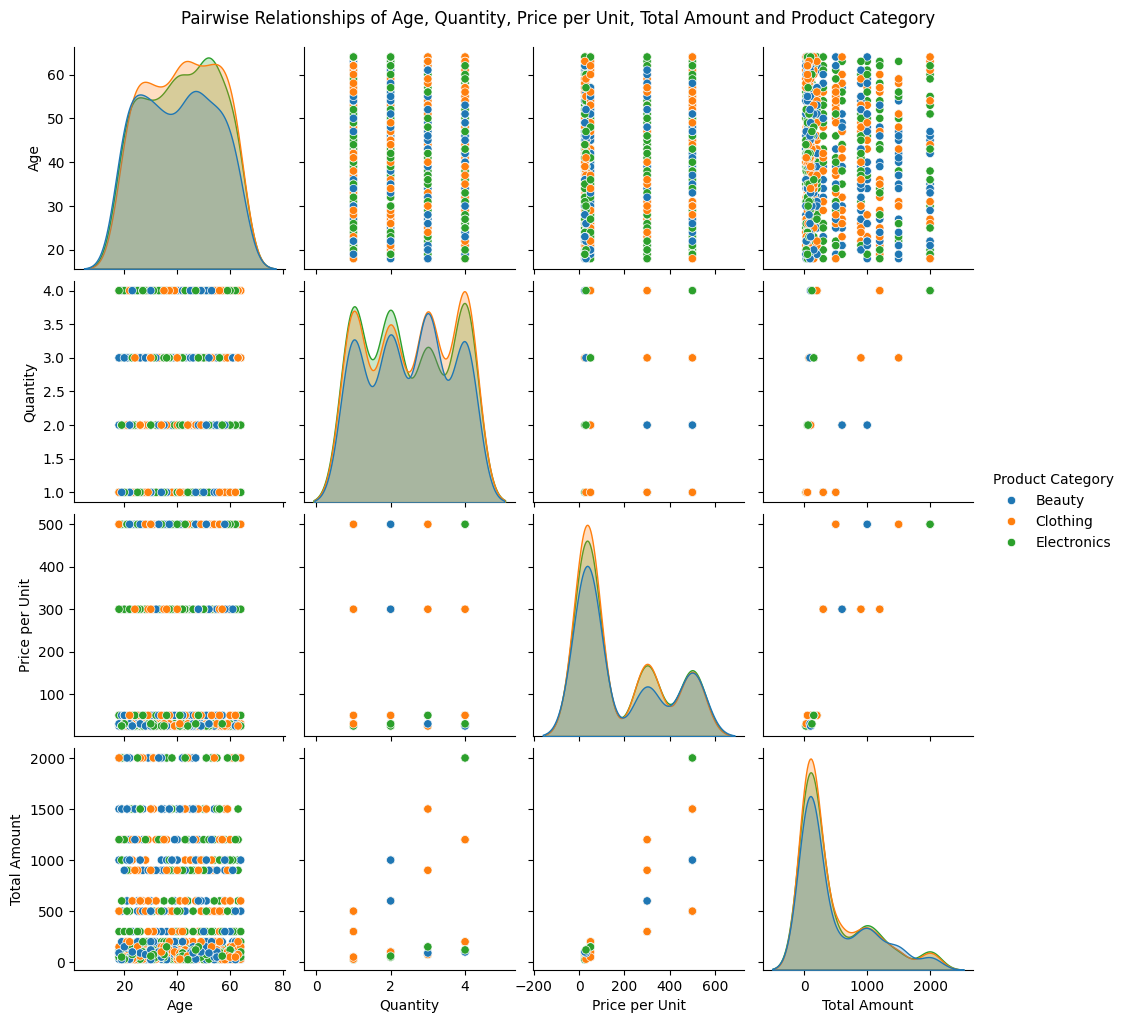

In [7]:
plt.figure(figsize=(8, 5))
sns.pairplot(df[['Age', 'Quantity','Price per Unit','Total Amount','Product Category']], hue='Product Category', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Age, Quantity, Price per Unit, Total Amount and Product Category", y=1.02) # Adjust suptitle position
plt.show()

* # Report
### In this dataset, Quantity, Price per Unit, and Total Amount exhibit positive skewness, while Age shows a more evenly distributed pattern.

## Encoding categorical Variables


**I shall be encoding both Gender and product Category columns, before then; below are what they contain.** 

* They are under Nominal variables, so we shall use **One-Hot Encoding** for Gender and Product Category column (as a feature to be used in clustering model)

In [8]:
print(df['Gender'].value_counts().head(10))

Gender
Female    510
Male      490
Name: count, dtype: int64


In [9]:
print(df['Product Category'].value_counts().head(10))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import OneHotEncoder
df_one_hot = df.copy()
one_hot_encoder = OneHotEncoder(sparse_output=False)
encode_features = one_hot_encoder.fit_transform(df_one_hot[['Gender', 'Product Category']])

ohe_df = pd.DataFrame(
    encode_features,
    columns=one_hot_encoder.get_feature_names_out(['Gender','Product Category'])
)

df_one_hot = pd.concat([df_one_hot, ohe_df], axis=1)
df_one_hot.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.0,1.0,1.0,0.0,0.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.0,0.0,0.0,1.0,0.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.0,1.0,0.0,0.0,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.0,1.0,0.0,1.0,0.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.0,1.0,1.0,0.0,0.0


In [11]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction ID                1000 non-null   int64  
 1   Date                          1000 non-null   object 
 2   Customer ID                   1000 non-null   object 
 3   Gender                        1000 non-null   object 
 4   Age                           1000 non-null   int64  
 5   Product Category              1000 non-null   object 
 6   Quantity                      1000 non-null   int64  
 7   Price per Unit                1000 non-null   int64  
 8   Total Amount                  1000 non-null   int64  
 9   Gender_Female                 1000 non-null   float64
 10  Gender_Male                   1000 non-null   float64
 11  Product Category_Beauty       1000 non-null   float64
 12  Product Category_Clothing     1000 non-null   float64
 13  Prod

In [12]:
df_one_hot.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,0.51000,0.49000,0.30700,0.351000,0.342000
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.50015,0.50015,0.46148,0.477522,0.474617
min,1.000000,18.00000,1.000000,25.000000,25.000000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,0.00000,0.00000,0.00000,0.000000,0.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,1.00000,0.00000,0.00000,0.000000,0.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,1.00000,1.00000,1.00000,1.000000,1.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,1.00000,1.00000,1.00000,1.000000,1.000000


In [13]:
df_one_hot.isnull().sum()

Transaction ID                  0
Date                            0
Customer ID                     0
Gender                          0
Age                             0
Product Category                0
Quantity                        0
Price per Unit                  0
Total Amount                    0
Gender_Female                   0
Gender_Male                     0
Product Category_Beauty         0
Product Category_Clothing       0
Product Category_Electronics    0
dtype: int64

In [14]:
clustering_features = df_one_hot[['Age', 'Quantity','Price per Unit','Total Amount',
                    'Gender_Female','Gender_Male',
                    'Product Category_Beauty','Product Category_Clothing',
                    'Product Category_Electronics']]
clustering_features.head()

,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,34,3,50,150,0.0,1.0,1.0,0.0,0.0
1,26,2,500,1000,1.0,0.0,0.0,1.0,0.0
2,50,1,30,30,0.0,1.0,0.0,0.0,1.0
3,37,1,500,500,0.0,1.0,0.0,1.0,0.0
4,30,2,50,100,0.0,1.0,1.0,0.0,0.0


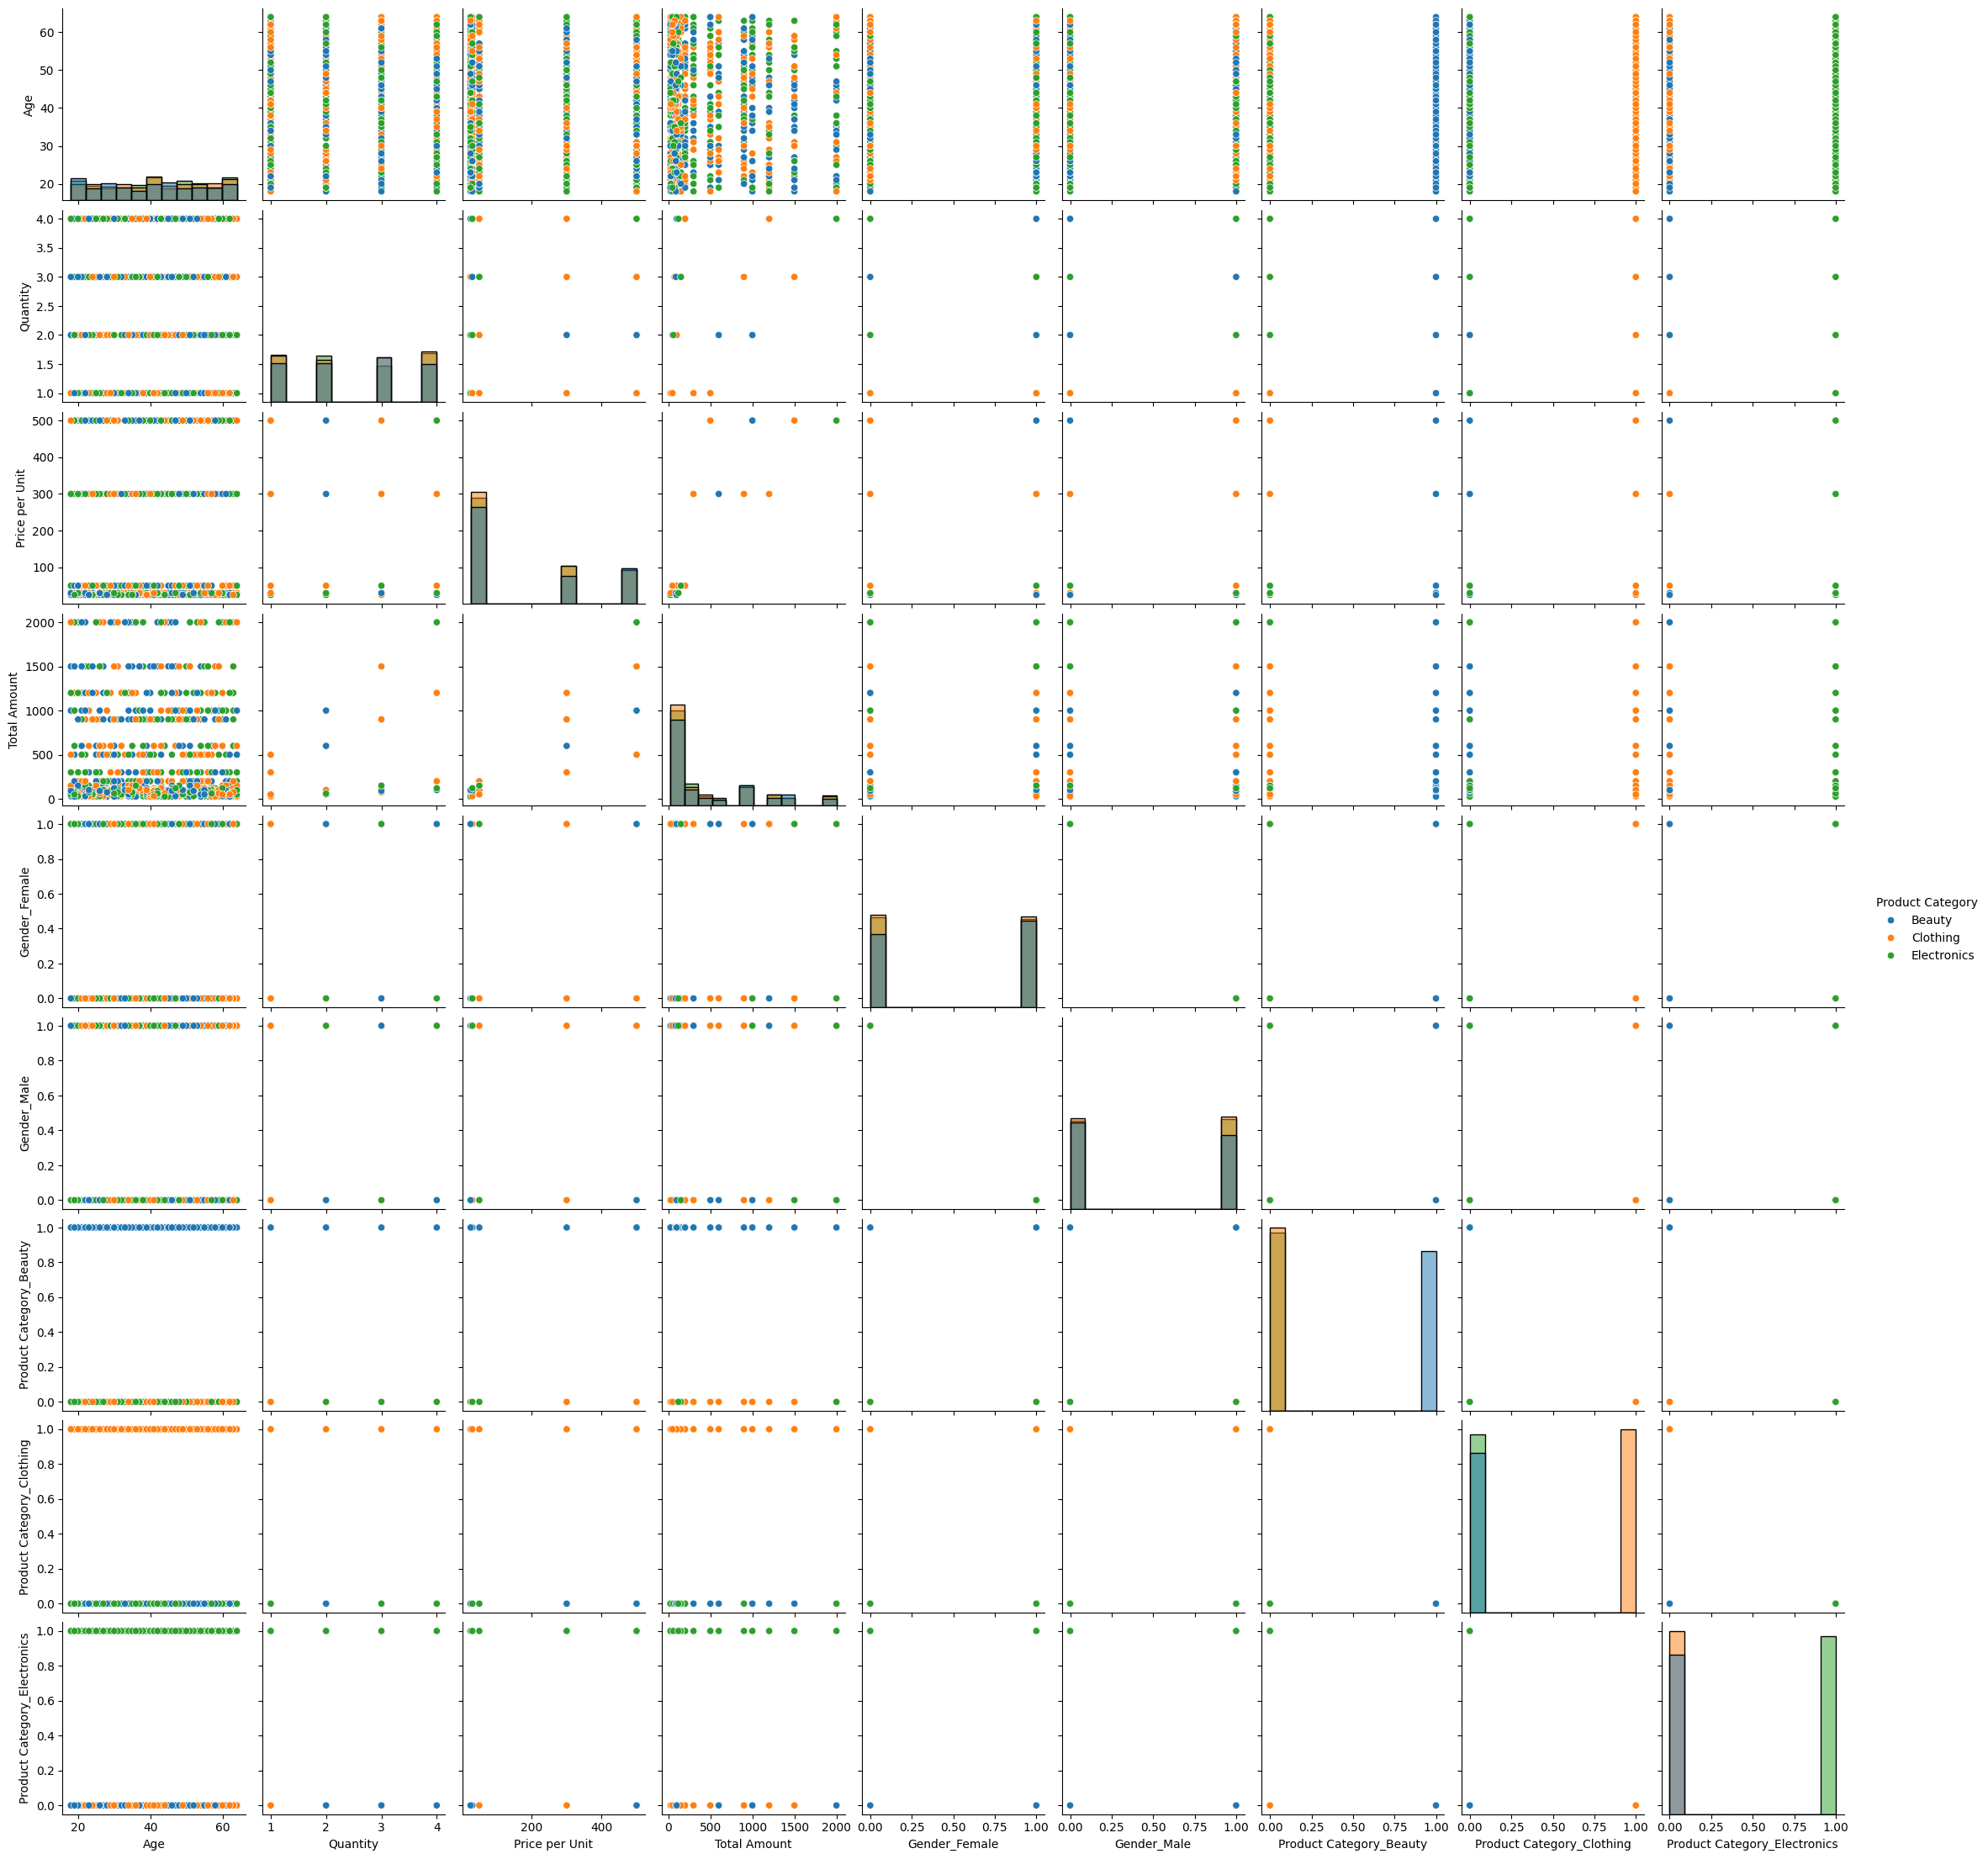

In [15]:
sns.pairplot(
    df_one_hot,
    vars=clustering_features,
    hue="Product Category",
    diag_kind="hist"
)
plt.show()

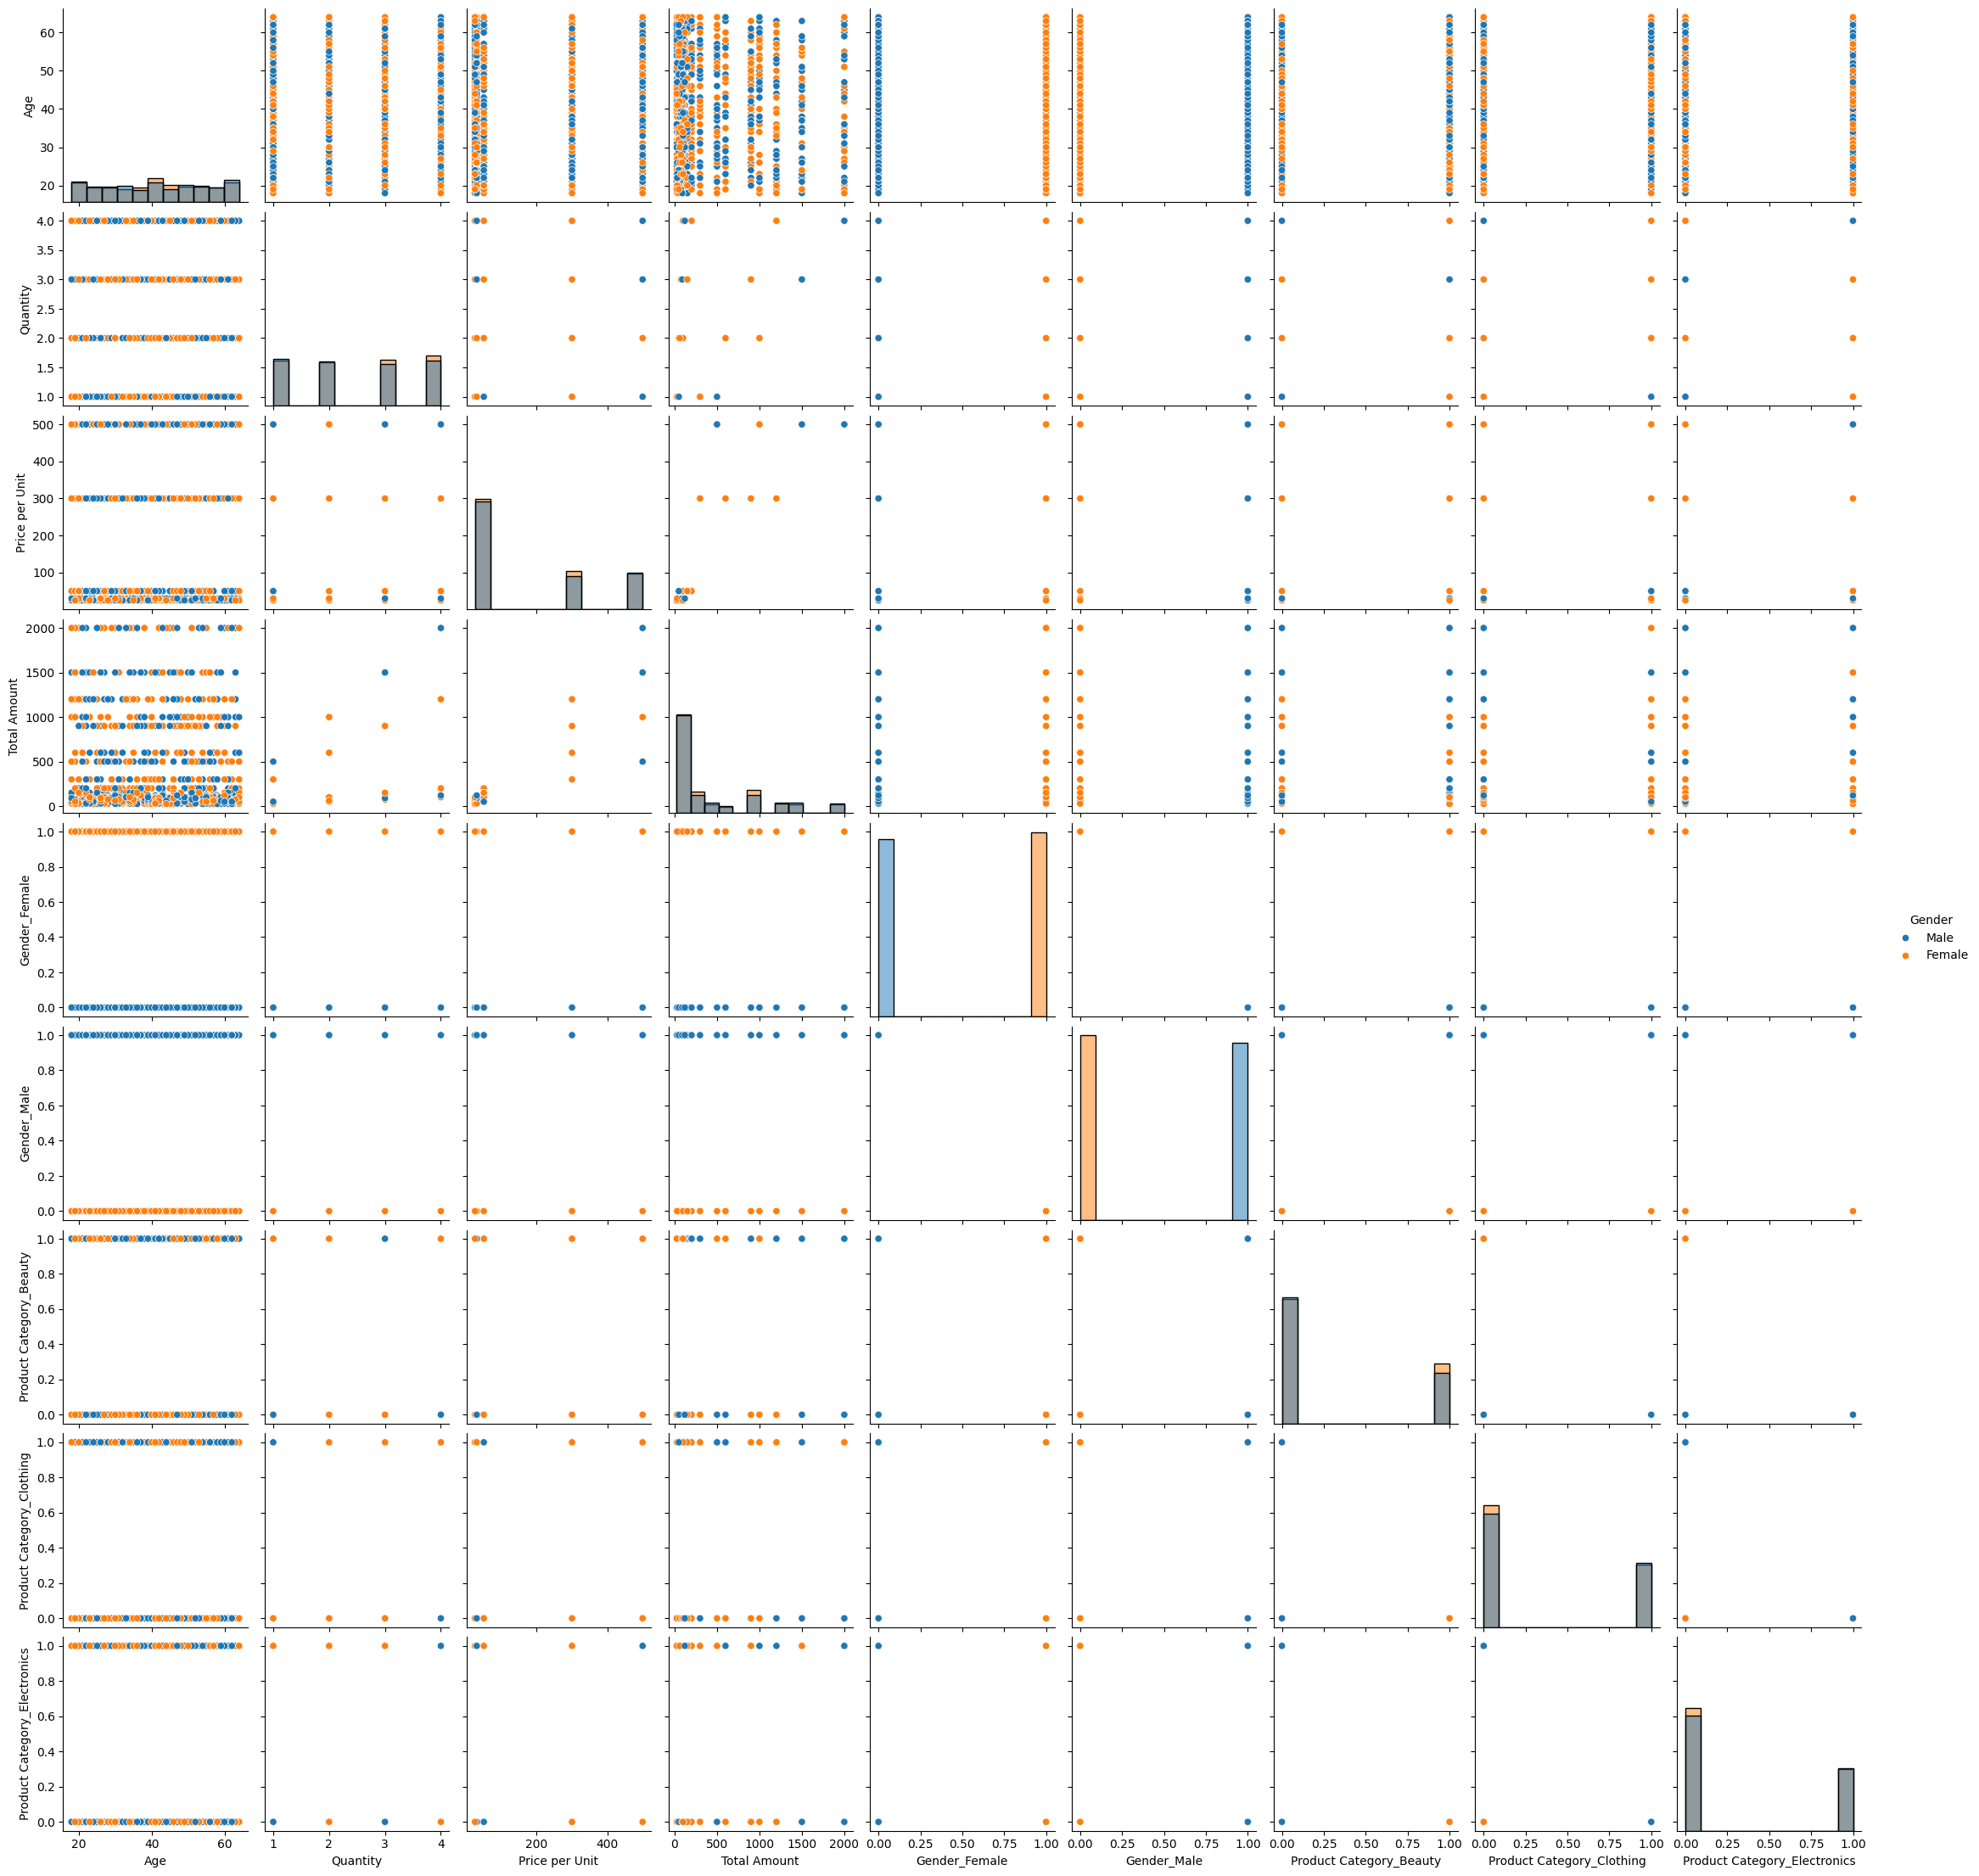

In [16]:
sns.pairplot(
    df_one_hot,
    vars=clustering_features,
    hue="Gender",
    diag_kind="hist"
)
plt.show()


## Each cluster likely represents a different type of constumer behavior

In [17]:
k_range = range(2, 15)
empty_inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(clustering_features)

    empty_inertias.append(kmeans.inertia_)

    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

k=2: Inertia = 75932968.26
k=3: Inertia = 31632624.01
k=4: Inertia = 15255174.56
k=5: Inertia = 9068252.62
k=6: Inertia = 6406385.59
k=7: Inertia = 4248482.82
k=8: Inertia = 2879926.38
k=9: Inertia = 1788627.91
k=10: Inertia = 750816.27
k=11: Inertia = 385668.91
k=12: Inertia = 322455.57
k=13: Inertia = 270402.63
k=14: Inertia = 238188.28


* ## # The elbow curve

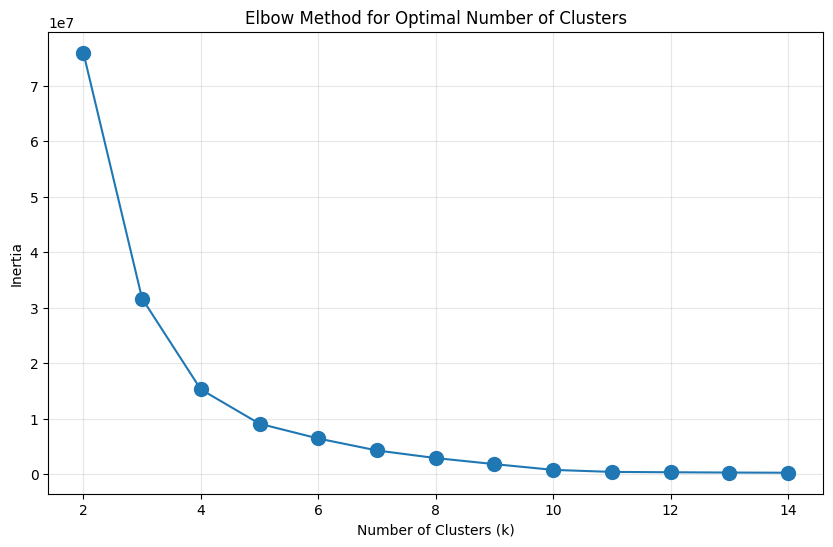

In [18]:

plt.figure(figsize=(10, 6))
plt.plot(k_range, empty_inertias, 'o-', markersize=10)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

 ### **SILHOUETTE SCORE**

In [19]:
silhouette_scores = []

for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_features)

    # Calculating silhouette score
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")


k=2: Silhouette Score = 0.752
k=3: Silhouette Score = 0.759
k=4: Silhouette Score = 0.769
k=5: Silhouette Score = 0.791
k=6: Silhouette Score = 0.807
k=7: Silhouette Score = 0.793
k=8: Silhouette Score = 0.831
k=9: Silhouette Score = 0.675
k=10: Silhouette Score = 0.703
k=11: Silhouette Score = 0.682
k=12: Silhouette Score = 0.653
k=13: Silhouette Score = 0.633
k=14: Silhouette Score = 0.640


In [20]:
print(cluster_labels[:10])

[11  7  9  3  0  9 12  0  8 10]


# Plotting the silhouette scores

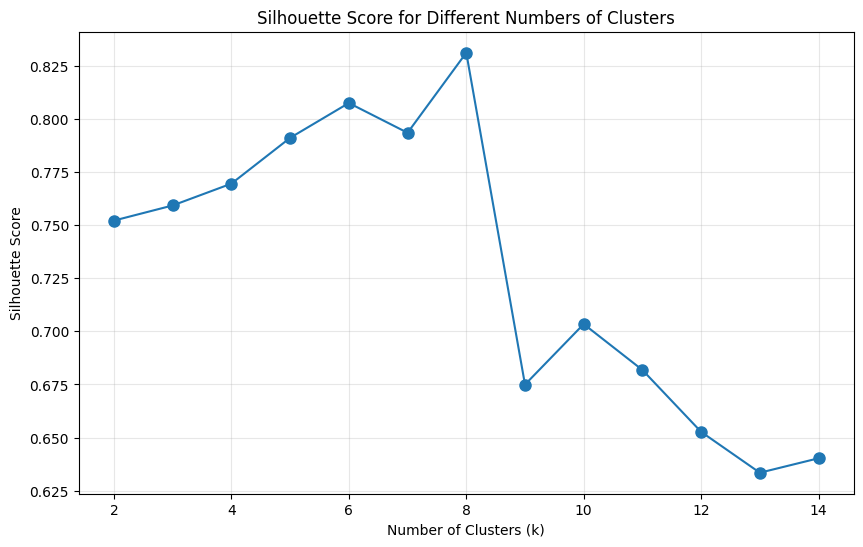

In [21]:

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

**The cluster with k=8 will be choosen**

In [22]:
final_kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)

cluster_labels = final_kmeans.fit_predict(clustering_features)

In [23]:
cluster_labels[:10]

array([0, 6, 0, 3, 0, 0, 0, 0, 3, 0], dtype=int32)

In [24]:
df_clustered = df_one_hot.copy()

df_clustered['predicted_cluster'] = cluster_labels

In [25]:
df_clustered["predicted_cluster"].unique()

array([0, 6, 3, 4, 2, 5, 7, 1], dtype=int32)

In [31]:
df_clustered.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,predicted_cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.0,1.0,1.0,0.0,0.0,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.0,0.0,0.0,1.0,0.0,6
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.0,1.0,0.0,0.0,1.0,0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.0,1.0,0.0,1.0,0.0,3
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.0,1.0,1.0,0.0,0.0,0


In [30]:
# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

0    604
3     86
5     62
1     54
4     50
6     49
2     49
7     46
Name: count, dtype: int64


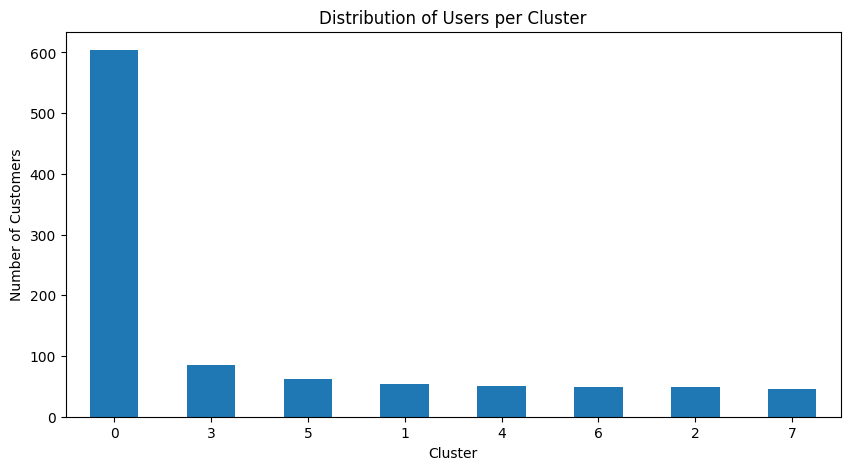

In [31]:
plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Users per Cluster')
plt.xticks(rotation=0)
plt.show()

### Using K=8 visualised that Cluster 0 dorminate the dataset.

* we will use groupby to check their simlarities.

## **The Cluster Summary Report**

In [35]:
numeric_df = df_clustered.select_dtypes(include=[np.number])

cluster_report = numeric_df.groupby('predicted_cluster').mean()

report_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount', 
                   'Gender_Female', 'Product Category_Beauty', 
                   'Product Category_Clothing', 'Product Category_Electronics']

final_report = cluster_report[report_features]

final_report.style.background_gradient(cmap='RdPu').format("{:.2f}")


,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
predicted_cluster,,,,,,,,
0,41.84,2.49,35.25,87.91,0.50,0.31,0.36,0.34
1,38.06,4.00,300.00,1200.00,0.54,0.26,0.37,0.37
2,39.73,4.00,500.00,2000.00,0.49,0.27,0.35,0.39
3,41.69,1.41,418.60,540.70,0.48,0.29,0.41,0.30
4,38.68,3.00,500.00,1500.00,0.46,0.42,0.30,0.28
5,41.34,3.00,300.00,900.00,0.55,0.29,0.37,0.34
6,42.82,2.00,500.00,1000.00,0.57,0.41,0.24,0.35
7,42.09,1.00,300.00,300.00,0.57,0.22,0.30,0.48


## **INTERPRETATION OF RESULT**
**High-Value Segments (The "VIPs")**
* the cluster 2, followed by clustter 4.
* These are your premium customers. Since the cluster 2 also shows a high mean for Product Category_Electronics; thus, electronics are the primary driver of our high-ticket revenue.

* Strategy: Focus on loyalty programs and exclusive previews for high-end product launches.

**High-Frequency / Basket Fillers**
* Clustter 1:
* These customers buy in bulk or purchase many small items. They likely dominate the Product Category_Clothing or Beauty segments where unit prices are lower but volume is higher.

* Strategy: Use cross-selling (e.g., "customers also bought") to increase their average unit price.

**Demographic Distinctions (Age & Gender)**

* Cluster 1 has an average age of 38.06 and Cluster 6 has an average age of 42.82. Therefore, the marketing language have shifted from "trending/latest" for the former to "quality/reliability" for the latter.

* Encoding Insight: Since we used One-Hot Encoding, a value like 0.57 in Gender_Female means that 57% of that cluster is female.

**Product Specialists**
* Clutter 4: (e.g., Product Category_Beauty > 0.42).

* This segment is highly specialized. They don't just "shop at the store"; they specifically come for Beauty products.

* Strategy: Avoid sending them broad "General Sale" emails; instead, send category-specific promotions.

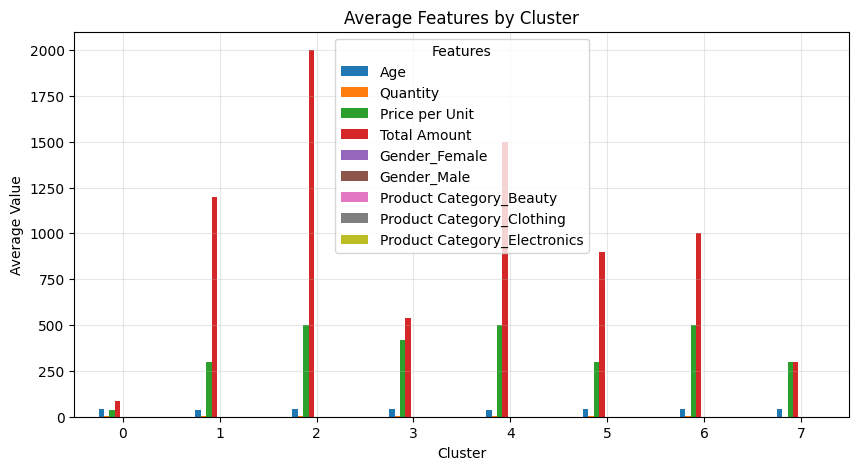

In [33]:
# Plot 4: Feature comparison by cluster
fig, axes = plt.subplots(figsize=(10, 5))
cluster_characteristics.plot(kind='bar', ax=axes)
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Average Features by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, alpha=0.3)
plt.show()

* Clustter 0 contain younger category that bought least  number of the goods.
* Clustter 0 will be deploy.

In [51]:
df_Amos_Clusters = df_clustered[df_clustered['predicted_cluster'] == 0].to_csv('cluster_Amos.csv', index=False)

In [52]:
df_Amos_Clusters = pd.read_csv("cluster_Amos.csv")

In [53]:
df_Amos_Clusters.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,predicted_cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.0,1.0,1.0,0.0,0.0,0
1,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.0,1.0,0.0,0.0,1.0,0
2,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.0,1.0,1.0,0.0,0.0,0
3,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,1.0,0.0,1.0,0.0,0.0,0
4,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,0.0,1.0,0.0,1.0,0.0,0
